In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

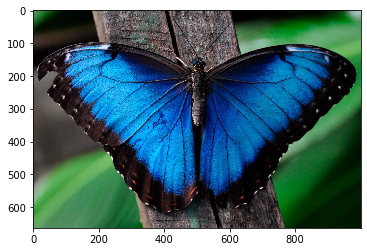

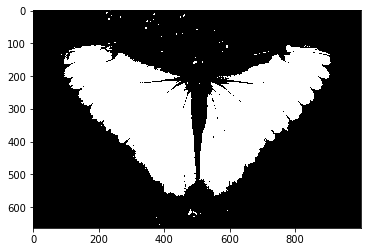

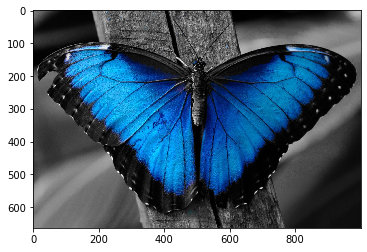

In [27]:
def transform(frame):
    #Obtener el tamaño de la imagen
    nrows, ncols, nch = frame.shape

    #Convertir imagen RGB a HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    #Establecer los rangos donde encontramos los colores azules
    lower = np.array([90, 50, 50])
    upper = np.array([130, 255, 255])
    #Encontrar los pixeles de la imagen azules
    mask = cv2.inRange(hsv, lower, upper)
    #Obtener y mostrar la imagen sólo con los píxeles azules
    frame_mask = cv2.bitwise_and(frame, frame, mask=mask)
    plt.figure()
    plt.imshow(mask,cmap='gray')
    plt.show()
    
    # Convertir la imagen de RGB a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = np.copy(frame)
    frame_gray[:, :, 0] = gray
    frame_gray[:, :, 1] = gray
    frame_gray[:, :, 2] = gray
    # Obtener la imagen de grises solo de los pixeles que no son azules
    frame_gray = cv2.bitwise_and(frame_gray, frame_gray, mask=~mask)

    # Sumar la imagen de grises y de azules
    return frame_mask + frame_gray

img = cv2.imread('mariposa.jpg')

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img = transform(img)

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

# Graficar los colores en 3d

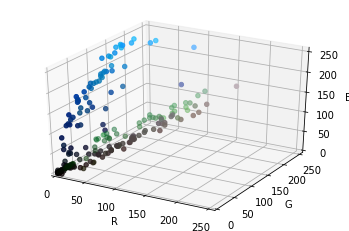

In [30]:
img = cv2.imread('mariposa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Vectorizar la imagen
nrows,ncols,nch = img.shape
Ximg = np.reshape(img,(nrows*ncols,3))

# Tomar sólo 200 pixeles al azar de la imagen
idx = np.random.permutation(len(Ximg))[:200]
Ximg = Ximg[idx,:]

# Graficar
fig = plt.figure()
ax = fig.gca(projection='3d')
R = Ximg[:,0]
G = Ximg[:,1]
B = Ximg[:,2]
ax.scatter(R, G, B, c=Ximg/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()